# Problem to solve

Sujet 1: Une compagnie Aérienne en développement                                                                                
 
soit une liste d’aéroports couverts par la compagnie ABC, ayant comme base l’aéroport « LGA » ,                                 
nous souhaitons trouver des trajets optimaux pour nos clients.                                                                 
Sachant que nos avions sont disponibles aux aéroports suivant:                                                                 

airports = ["BGI", "CDG", "DEL", "DOH", "DSM", "EWR", "EYW", "HND", "ICN", "JFK", "LGA", "LHR", "ORD", "SAN", "SFO", "SIN", "TLV", "BUD"]                                                                                                                   
et que nous avons les connections (DANS UN SEUL SENS) suivantes:                                                               
connexions = [                                                                                                                 
	["DSM", "ORD"],                                                                                                            
	["ORD", "BGI"],                                                                                                            
	["BGI", "LGA"],                                                                                                            
	["SIN", "CDG"],                                                                                                            
	["CDG", "BUG"],                                                                                                            
	["DEL", "DOH"],                                                                                                            
	["DEL", "CDG"],                                                                                                            
	["TLV", "DEL"],                                                                                                            
	["EWR", "HND"],                                                                                                            
	["HND", "ICN"],                                                                                                            
	["ICN", "JFK"],	                                                                                                           
	["JFK", "LGA"],                                                                                                            
	["EYW", "LHR"],                                                                                                            
	["LHR", "SFO"],                                                                                                            
	["SFO", "SAN"],                                                                                                            
	["SFO", "DSM"],                                                                                                            
	["SAN", "EYW"],                                                                                                            
]                                                                                                                              
exemple: on peut prendre un vol de DSM vers ORD et uniquement dans ce sens                                                     
l’idée est d’assurer que tous les aéroports dans la liste airports soient accessibles à partir de LGA,                         
écrire un algorithme (pseudo code et/ou graphique puis code si possible) pour déterminer le nombre minimum de connections (dans un seul sens) à ouvrir pour permettre aux voyageurs de joindre tous les autres aéroports depuis LGA.                           

# Solution

After importing necessary libraries we create empty graph using networkx and a list of connexions.

In [284]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict 

G = nx.Graph()
connexions = [
    ["DSM", "ORD"],
	["ORD", "BGI"],
	["BGI", "LGA"],
	["SIN", "CDG"],
	["CDG", "BUG"],
	["DEL", "DOH"],
	["DEL", "CDG"],
	["TLV", "DEL"],
	["EWR", "HND"],
	["HND", "ICN"],
	["ICN", "JFK"],	
	["JFK", "LGA"],
	["EYW", "LHR"],	
	["LHR", "SFO"],
	["SFO", "SAN"],	
	["SFO", "DSM"],
	["SAN", "EYW"]  ]



I was confused about the data extracted from the problem so i made two solution.

1st solution:
we fill the graph with imformation from the list(connections), this graph contain a pathes on both ways 
that mean it can start from "DSM" to "ORD" or from "ORD" to "DSM".
we did this because it's the only way that make sure all airports will be accessible from LGA.
"l’idée est d’assurer que tous les aéroports dans la liste airports soient accessibles à partir de LGA"

In [285]:
for pts in connexions:
    G.add_edge(pts[0], pts[1])

2nd solution:
this graph contain a pathes on a one direction mean it can start from "DSM" to "ORD" but can't start from "ORD" to "DSM". we did this because it's the only way to ensure we respect what the problem told us.
"les connections (DANS UN SEUL SENS)"

In [286]:
graphtest = defaultdict(list)
for connexion in connexions: 
        a, b = connexion[0], connexion[1] 
        # Creating the graph  
        # as adjacency list 
        graphtest[a].append(b)
        graphtest[b].append(a)
    

we create the graph nodes and the edges between them.

In [287]:
path_edges = zip(path, path[1:])
path_edges = set(path_edges)
pos = nx.spring_layout(graphtest)
pos2 = nx.spring_layout(G)

After choosing the color of nodes we just desplay it with plt.show()

this is a path when we can go forward and backward.

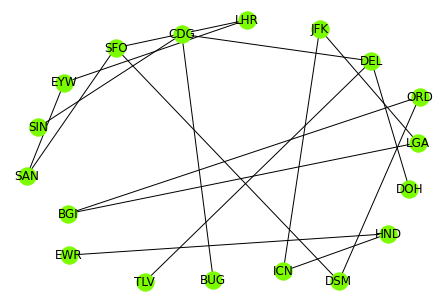

In [288]:
nx.draw(G, pos, node_color='lawngreen', with_labels = True)
plt.show()    

this a path for one direction.

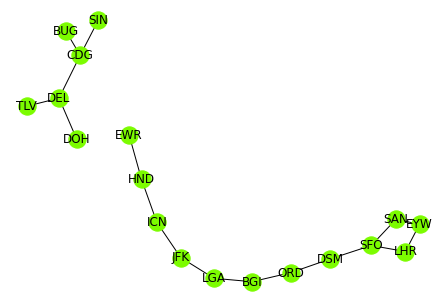

In [289]:
nx.draw(G, pos2, node_color='lawngreen', with_labels = True)
plt.show()

create a function to identify the shortest path.

In [290]:
def short_Path(G, start, goal): 
    explored = [] 
      
    # Queue for traversing the  
    # graph in the short_Path 
    queue = [[start]] 
      
    # test if the desired node is  
    # the same as the start node 
    if start == goal: 
        print("Same Node") 
        return
      
    # Loop to traverse the graph  
    # with the help of the queue 
    while queue: 
        path = queue.pop(0) 
        node = path[-1] 
          
        # Codition to check if the 
        # current node is not visited 
        if node not in explored: 
            neighbours = graph[node] 
              
            # Loop to iterate over the  
            # neighbours of the node 
            for neighbour in neighbours: 
                new_path = list(path) 
                new_path.append(neighbour) 
                queue.append(new_path) 
                  
                # Condition to check if the  
                # neighbour node is the goal 
                if neighbour == goal: 
                    print("Shortest path = ", *new_path) 
                    return
            explored.append(node) 
  
    # Condition when the nodes  
    # are not connected 
    print("So sorry, but this connecting path doesn't exist :(") 
    return

calling the fuction to excute it.

In [294]:
 # Graph using dictionaries 
graph2 = graphtest
graph1 = G

      
 # Function Call 
short_Path(graph1, 'LGA', 'DSM') 
short_Path(graph2, 'DSM', 'LGA') 
 

So sorry, but this connecting path doesn't exist :(
Shortest path =  DSM ORD BGI LGA
